# Problem 7.1

### The goal of this problem is to investigate the role of the proposed distribution in a Metropolis-Hastings algorithm designed to simulate from the posterior distribution of a parameter δ. In part (a), you are asked to simulate data from a distribution with δ known. For parts (b)-(d), assume δ is unknown with a Unif(0,1) prior distribution for δ. For parts (b)-(d), provide an appropriate plot and a table summarizing the output of the algorithm. To facilitate comparisons, use the same number of iterations, random seed, starting values, and burn-in period for all implementations of the algorithm.

### (a) Simulate 200 realizations from the mixture distribution in Equation (7.6) with δ=0.7. Draw a histogram of these data. 

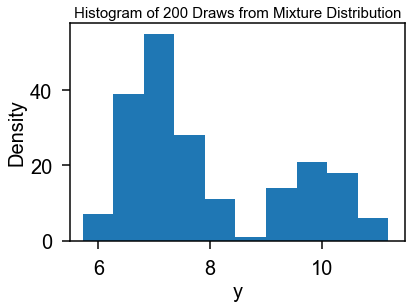

In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mu_1 = 7
mu_2 = 10
sigma_1 = sigma_2 = 0.5
np.random.seed(0)

# Delta used implicitly here
values = np.hstack((norm.rvs(loc=mu_1,scale=sigma_1,size=140),norm.rvs(loc=mu_2,scale=sigma_2,size=60)))

plt.hist(values)
plt.title("Histogram of 200 Draws from Mixture Distribution",fontsize=15)
plt.xlabel('y',fontsize=20)
plt.xlim((5.5,11.5))
plt.ylabel('Density',fontsize=20)
plt.show()


### (b) Implement an independence chain MCMC procedure to simulate from the posterior distribution of δ, using your data from part (a).

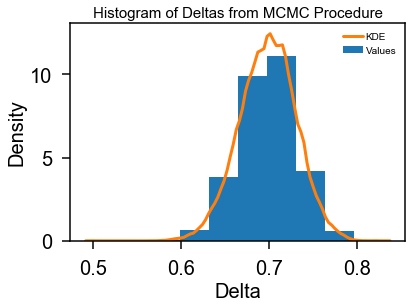

Table of Deltas from MCMC Procedure (last 100 iterations)


"Iteration,t",Delta
199900,[0.70637962]
199901,[0.70637962]
199902,[0.70637962]
199903,[0.70637962]
199904,[0.70637962]
199905,[0.70637962]
199906,[0.70637962]
199907,[0.70637962]
199908,[0.70637962]
199909,[0.66650426]


In [2]:
from scipy.stats import uniform
import seaborn as sns
import pandas as pd

m = 200000
delta = 0.5
deltas = []
deltas.append(delta)

def mix_dist(data,delta):
    return (delta*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-delta)*norm.pdf(data,loc=mu_2,scale=sigma_2))

def likelihood(delta):
    return np.product(mix_dist(values,delta))

appendedlist = []

for i in range(m):
    delta_star = uniform.rvs(loc=0,scale=1,size=1)
    
    ratio = likelihood(delta_star)/likelihood(deltas[i])
    
    prob_val = uniform.rvs(loc=0,scale=1,size=1)
    
    minimum = np.min((ratio,1))
    
    data_value = [i,deltas[i]]
    appendedlist.append(data_value)
    
    if prob_val <= minimum:
        deltas.append(delta_star)
    else:
        deltas.append(deltas[i])
        
data_value = [i,deltas[i]]
appendedlist.append(data_value)

plt.hist(deltas,density=True,label="Values")
sns.distplot(deltas,hist=False,label="KDE")
plt.title("Histogram of Deltas from MCMC Procedure",fontsize=15)
plt.xlabel('Delta',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()
    
print("Table of Deltas from MCMC Procedure (last 100 iterations)")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Delta'])
df = df.iloc[199900:m,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

### (c) Implement a random walk chain with δ^∗ = δ(t) + ε with ε ∼Unif(−1,1)

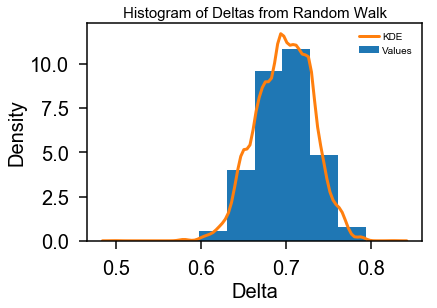

Table of Deltas from Random Walk (last 100 iterations)


"Iteration,t",Delta
9900,[0.70807231]
9901,[0.70807231]
9902,[0.70807231]
9903,[0.70807231]
9904,[0.62891903]
9905,[0.62891903]
9906,[0.62891903]
9907,[0.62891903]
9908,[0.62891903]
9909,[0.62891903]


In [3]:
m = 10000
delta = 0.5
deltas = []
deltas.append(delta)

def mix_dist(data,delta):
    return (delta*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-delta)*norm.pdf(data,loc=mu_2,scale=sigma_2))

def likelihood(delta):
    return np.product(mix_dist(values,delta))

appendedlist = []

for i in range(m):
    eps = uniform.rvs(loc=-1,scale=2,size=1)
    delta_star = deltas[i] + eps
    
    ratio = likelihood(delta_star)/likelihood(deltas[i])
    
    prob_val = uniform.rvs(loc=0,scale=1,size=1)
    
    data_value = [i,deltas[i]]
    appendedlist.append(data_value)
    
    if prob_val <= ratio and 1>= delta_star >=0:
        deltas.append(delta_star)
    else:
        deltas.append(deltas[i])
    
data_value = [i,deltas[i]]
appendedlist.append(data_value)

plt.hist(deltas,density=True,label="Values")
sns.distplot(deltas,hist=False,label="KDE")
plt.title("Histogram of Deltas from Random Walk",fontsize=15)
plt.xlabel('Delta',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

print("Table of Deltas from Random Walk (last 100 iterations)")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Delta'])
df = df.iloc[9900:m,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

### (d) Reparameterize the problem letting U = log{δ/(1 − δ)} and U^∗ = u(t) + ε. Implement a random walk chain in U-space as in Equation (7.8).

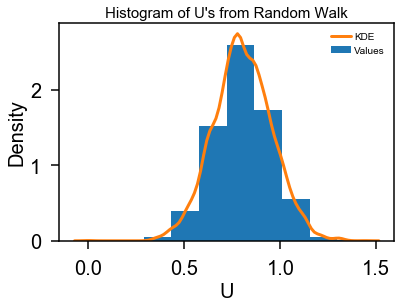

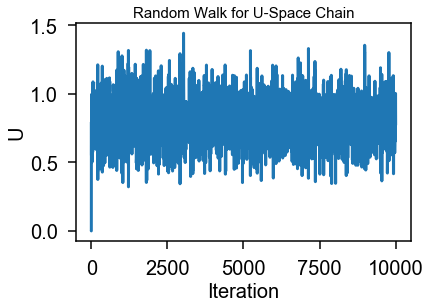

Table of U's from Random Walk (last 100 iterations)


"Iteration,t",Delta
9900,[0.78267095]
9901,[0.78267095]
9902,[0.78267095]
9903,[0.7326691]
9904,[0.7326691]
9905,[0.7326691]
9906,[0.83953753]
9907,[0.83953753]
9908,[0.83953753]
9909,[0.83953753]


In [4]:
from scipy.special import expit,logit

m = 10000
delta = logit(0.5)
deltas = []
deltas.append(delta)

def mix_dist(data,u):
    return (expit(u)*norm.pdf(data,loc=mu_1,scale=sigma_1) + (1-expit(u))*norm.pdf(data,loc=mu_2,scale=sigma_2))

def likelihood(delta):
    return np.product(mix_dist(values,delta))

appendedlist = []

for i in range(m-1):
    eps = uniform.rvs(loc=-1,scale=2,size=1)
    delta_star = deltas[i] + eps
    
    jacobian = np.abs((1/np.exp(deltas[i]))/((1+np.exp(deltas[i]))**2))
    jacobian_star = np.abs((1/np.exp(delta_star))/((1+np.exp(delta_star))**2))
    
    ratio = (likelihood(delta_star)*jacobian_star)/(likelihood(deltas[i])*jacobian)
    
    prob_val = uniform.rvs(loc=0,scale=1,size=1)
    
    data_value = [i,deltas[i]]
    appendedlist.append(data_value)
    
    if prob_val <= ratio and 1>= expit(delta_star) >=0:
        deltas.append(delta_star)
    else:
        deltas.append(deltas[i])

data_value = [i,deltas[i]]
appendedlist.append(data_value)
        
plt.figure()
plt.hist(deltas,density=True,label="Values")
sns.distplot(deltas,hist=False,label="KDE")
plt.title("Histogram of U's from Random Walk",fontsize=15)
plt.xlabel('U',fontsize=20)
plt.ylabel('Density',fontsize=20)

vals = np.linspace(0,10000,10000)

plt.figure()
plt.plot(vals,deltas)
plt.title("Random Walk for U-Space Chain",fontsize=15)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('U',fontsize=20)
plt.show()

print("Table of U's from Random Walk (last 100 iterations)")
df = pd.DataFrame(appendedlist, columns = ['Iteration,t','Delta'])
df = df.iloc[9900:m,:]
df = df.style.hide_index()
df = df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
df

### (e) Compare the estimates and convergence behavior of the three algorithms.

The algorithm that got the closest was the Markov-Chain Monte-Carlo. On its final iteration, delta was equal to 0.7195 which is only 0.0195 away from the actual delta of 0.7. The random walk chain method had a final delta equal to 0.7257 which is 0.0257 away from the true delta. Finally, the reparameterized random walk chain had a final delta equal to 0.7719 which is 0.0719 away from the true delta. Granted, the random walk chain methods both ran for less iterations than the MCMC method but I don't think my computer could handle running that many iterations for all of them. As for convergence behavior, both the MCMC and random walk chain method seemed to get closer to the true delta value and stay within 0.1 of that delta value, especially toward the end which means that the values weren't bouncing wildly around. With the reparameterized random walk chain, even a the end the values were all over the place. Delta was jumping between 0.4s and 1s for the last 100 iterations with the last value before hitting 0.7719 being 1.002. This means that the convergence isn't very good for this algorithm and depending on which iteration you stop on, you could actually be farther away from the value you are searching for. 

# Problem 7.2

### Simulating from the mixture distribution in Equation (7.6) is straightforward [see part (a) of Problem 7.1]. However, using the Metropolis–Hastings algorithm to simulate realizations from this distribution is useful for exploring the role of the proposal distribution.

### (a) Implement a Metropolis–Hastings algorithm to simulate from Equation (7.6) with δ = 0.7, using N(x(t), 0.012) as the proposal distribution. For each of three starting values, x(0) = 0, 7, and 15, run the chain for 10,000 iterations. Plot the sample path of the output from each chain. If only one of the sample paths was available, what would you conclude about the chain? For each of the simulations, create a histogram of the realizations with the true density superimposed on the histogram. Based on your output from all three chains, what can you say about the behavior of the chain?

### (b) Now change the proposal distribution to improve the convergence properties of the chain. Using the new proposal distribution, repeat part (a).